<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/IMDBKerasEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings
* IMDB dataset
* GloVe Embedding
* Attempt to classify sentiment of review


# Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import zipfile
import requests

from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import preprocessing

from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Dense

%tensorflow_version 1.x

# Example Tokenizing


In [5]:
sample = ['The quick brown fox jumped over the lazy dog.', 
          'Now is the time for all good men to come to the aid of their country.']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(sample)

sequences  = tokenizer.texts_to_sequences(sample)
one_hot    = tokenizer.texts_to_matrix(sample, mode='binary')
word_index = tokenizer.word_index

print(f'There are {len(word_index)} tokens')

There are 21 tokens


In [7]:
sequences

[[1, 3, 4, 5, 6, 7, 1, 8, 9],
 [10, 11, 1, 12, 13, 14, 15, 16, 2, 17, 2, 1, 18, 19, 20, 21]]

In [0]:
one_hot

# Load Data
* Pull in the IMDB data from Keras

In [11]:
MAX_FEATURES = 1000
MAX_LENGTH = 20

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = MAX_FEATURES)

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_LENGTH)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LENGTH)

17465344/17464789 [==============================] - 2s 0us/step


# Toy Embedding Model
* We build up a simple embedding model
* Take text sequence into embedding 1000 Words -> Size 8 Embedding Vector
* Flatten the sentence sequence (of size MAX_LENGTH) Size 8 Embedding per word * 20 words
* Pass that through a sigmoid to get sentiment


In [15]:
model = Sequential()

model.add(Embedding(1000, 8, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             8000      
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


## Fit Model

In [16]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size=32,
                    validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 2s 87us/step - loss: 0.6788 - acc: 0.5926 - val_loss: 0.6449 - val_acc: 0.6642
Epoch 2/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.5773 - acc: 0.7183 - val_loss: 0.5527 - val_acc: 0.7132
Epoch 3/10
20000/20000 [==============================] - 1s 48us/step - loss: 0.5106 - acc: 0.7475 - val_loss: 0.5295 - val_acc: 0.7272
Epoch 4/10
20000/20000 [==============================] - 1s 47us/step - loss: 0.4876 - acc: 0.7618 - val_loss: 0.5246 - val_acc: 0.7314
Epoch 5/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.4754 - acc: 0.7693 - val_loss: 0.5235 - val_acc: 0.7356
Epoch 6/10
20000/20000 [==============================] - 1s 48us/step - loss: 0.4664 - acc: 0.7727 - val_loss: 0.5253 - val_acc: 0.7342
Epoch 7/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.4580 - acc: 0.7797 - val_loss: 0.5265 - 

## Plot Accuracy
* Validation Accuracy around 0.7

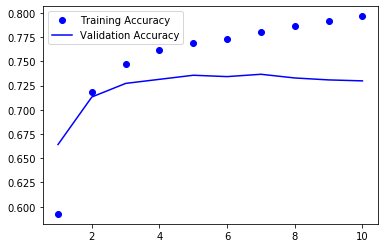

In [20]:
epochs = range(1, len(history.history['acc']) + 1) 
plt.plot(epochs, history.history['acc'],     'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b',  label='Validation Accuracy')
plt.legend()
plt.show()

# Raw IMDB Data

## Pull Data

In [34]:
imdb_url   = 'http://mng.bz/0tIo'
imdb_local = 'aclimdb.zip'

r = requests.get(imdb_url, verify=False)
with open(imdb_local, "wb") as code:
    code.write(r.content)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
zip = zipfile.ZipFile(imdb_local)
zip.extractall()

## Process 

In [0]:
imdb_folder = 'aclImdb'
train_dir = os.path.join(imdb_folder, 'train')

labels = []
texts  = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      with open(os.path.join(dir_name, fname)) as f:
        texts.append(f.read())
        labels.append(0 if label_type == 'neg' else 1)

In [41]:
texts[0 : 5]

['I have to agree with most everyone\'s opinion that this show was poorly produced as well as written.The acting was not much more above the lower production values however I feel an actor can only rely on the material provided to them and make the best of it. In keeping with this thought I feel it is important to point out that one actor has risen and persevered well beyond this campy to tasteless production to have become a respectable and quite talented performer.I am referring to Laura Harris a Canadian born actor who has etched her way through many poorly produced shows and movies to find a place on the HBO hit "Dead Like Me" where she plays the role of Daisy Adair and to her credit she handles this role in an efficient manner.I remember having a typical boyhood crush on the young actress during this series where she played Ashley a soft spoken yet intelligent 7th grader.I felt as though if anyone might "make it" from this series it surely would be Laura Harris and true to her nat

In [42]:
labels[0 : 5]

[0, 0, 0, 0, 0]

## Tokenize

In [47]:
MAX_WORDS = 10000
MAX_LENGTH = 100
TRAINING_SAMPLES = 200
VALIDATION_SAMPLES = 10000

tokenizer = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} tokens')

Found 88582 tokens


In [49]:
data = pad_sequences(sequences, maxlen=MAX_LENGTH)
labels = np.asarray(labels)

print(f'Data  Shape {data.shape}')
print(f'Label Shape {labels.shape}')

Data  Shape (25000, 100)
Label Shape (25000,)


## Shuffle Data

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

## Train - Test

In [0]:
X_train = data[:TRAINING_SAMPLES]
y_train = labels[:TRAINING_SAMPLES]

X_val = data[TRAINING_SAMPLES : TRAINING_SAMPLES + VALIDATION_SAMPLES]
y_val = labels[TRAINING_SAMPLES : TRAINING_SAMPLES + VALIDATION_SAMPLES]

# GloVe
* Download GloVe pretrained embeddings 
* File is large (822 MB)

## Pull Data

In [0]:
glove_url   = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_local = 'glove.zip'

r = requests.get(glove_url)
with open(glove_local, "wb") as code:
    code.write(r.content)

In [0]:
zip = zipfile.ZipFile(glove_local)
zip.extractall()

## Tokenize

In [0]:
glove_index = {}
f = open('glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coef = np.asarray(values[1:], dtype='float32')
  glove_index[word] = coef
f.close()

In [30]:
print(f'Glove Index has {len(glove_index):,} words')

Glove Index has 400,000 words


## Embedding

In [0]:
EMBEDDING_DIM = 100

embedding_matrix = np.zeros((MAX_WORDS, EMBEDDING_DIM))
for word, i in word_index.items():
  if i < MAX_WORDS:
    embedding_vector = glove_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [53]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.61896998, -0.63664001, -0.30307001, ..., -1.43369997,
        -0.61346   , -0.43518001],
       [ 0.25948   ,  0.14112   , -0.18577   , ...,  0.47609001,
        -0.52741998,  0.30388001],
       [ 0.19607   ,  0.59483999,  0.028115  , ..., -0.43404999,
         0.477     ,  0.16965   ]])

# Model : Pre-Trained & Frozen Embeddings
* Use GloVe Weights
* Freeze the Embedding Layer

In [68]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Load Embedding & Freeze 

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Compile & Train

In [71]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_val, y_val))
model.save_weights('pretrain_frozen_weights.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 3.3158 - acc: 0.5150 - val_loss: 0.7453 - val_acc: 0.5098
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.5335 - acc: 0.6950 - val_loss: 0.8487 - val_acc: 0.5155
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.4616 - acc: 0.7400 - val_loss: 1.0486 - val_acc: 0.5033
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.2893 - acc: 0.8700 - val_loss: 0.7039 - val_acc: 0.5721
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1171 - acc: 0.9900 - val_loss: 1.1497 - val_acc: 0.5083
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2857 - acc: 0.8700 - val_loss: 0.7818 - val_acc: 0.5696
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0463 - acc: 1.0000 - val_loss: 0.8989 - val_acc: 0.5532
Epoch 8/10
200/200 [=

## Plot Accuracy
* 55% - 60%

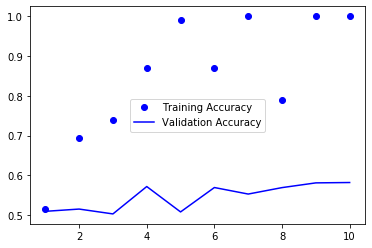

In [72]:
epochs = range(1, len(history.history['acc']) + 1) 
plt.plot(epochs, history.history['acc'],     'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b',  label='Validation Accuracy')
plt.legend()
plt.show()

# Model : Pre-Trained Embeddings
* Use GloVe Weights
* Allow our model to adjust the weights of the Embedding layer





In [73]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Load Embedding


In [0]:
model.layers[0].set_weights([embedding_matrix])

## Compile & Train

In [75]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_val, y_val))
model.save_weights('pretrain_unfrozen_weights.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 1.5072 - acc: 0.5450 - val_loss: 0.7428 - val_acc: 0.5082
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6462 - acc: 0.6950 - val_loss: 1.0380 - val_acc: 0.4978
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.4319 - acc: 0.7950 - val_loss: 1.0688 - val_acc: 0.4976
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2915 - acc: 0.8650 - val_loss: 0.8361 - val_acc: 0.5109
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1717 - acc: 0.9850 - val_loss: 1.1702 - val_acc: 0.5042
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1057 - acc: 0.9850 - val_loss: 0.7502 - val_acc: 0.5738
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.4348 - acc: 0.8750 - val_loss: 0.7269 - val_acc: 0.5802
Epoch 8/10
200/200 [=

## Plot Accuracy
* 55-60%

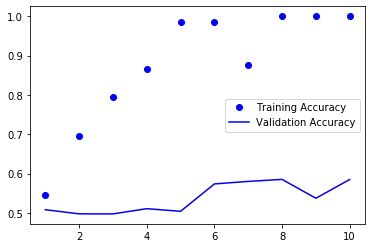

In [76]:
epochs = range(1, len(history.history['acc']) + 1) 
plt.plot(epochs, history.history['acc'],     'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b',  label='Validation Accuracy')
plt.legend()
plt.show()

# Model : No Pre-Trained Embeddings
* As a baseline, let's train the model without the embedding layer loaded with GloVe
* We'll learn the embeddings as we train the network

In [77]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Compile & Train

In [78]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_val, y_val))
model.save_weights('train_weights.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 15ms/step - loss: 0.6951 - acc: 0.5050 - val_loss: 0.6915 - val_acc: 0.5334
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.5068 - acc: 0.9800 - val_loss: 0.6880 - val_acc: 0.5440
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2867 - acc: 0.9900 - val_loss: 0.6879 - val_acc: 0.5440
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1346 - acc: 0.9900 - val_loss: 0.6916 - val_acc: 0.5419
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0674 - acc: 1.0000 - val_loss: 0.6922 - val_acc: 0.5497
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0352 - acc: 1.0000 - val_loss: 0.6959 - val_acc: 0.5484
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.7079 - val_acc: 0.5360
Epoch 8/10
200/200 [=

## Plot Accuracy
50-55%

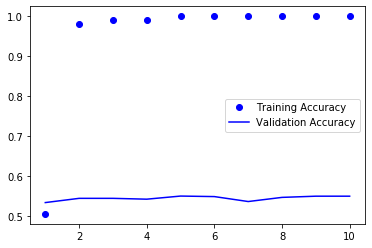

In [79]:
epochs = range(1, len(history.history['acc']) + 1) 
plt.plot(epochs, history.history['acc'],     'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b',  label='Validation Accuracy')
plt.legend()
plt.show()

# Comparison
* Pre-Trained GloVe outperformed 
* 55-60% accuracy compared to 50-55%


# Improvements
* We modeled this sentiment task as an Embedding
* We only looked at 200 sentences
* We passed the data throught a relu / linear and into a sigmoid classifier
* More or less, this simple model looks at a bag of words
* We tested pre-trained GloVe embeddings
* We can improve on this by stacking recurrent layers on top of our embedding